<a href="https://colab.research.google.com/github/ITboxer/MachineLearning/blob/main/7_Neural_Net_Components.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Activation, Initialization, Dropout, Batch normalization

In [4]:
%matplotlib inline 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Model, layers, initializers

## 데이터 전처리

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1,32*32,3).astype(np.float32)
y_train_onehot = np.eye(10)[y_train]
x_test = x_test.reshape(-1,32*32,3).astype(np.float32)
y_test_onehot = np.eye(10)[y_test]

170500096/170498071 [==============================] - 4s 0us/step


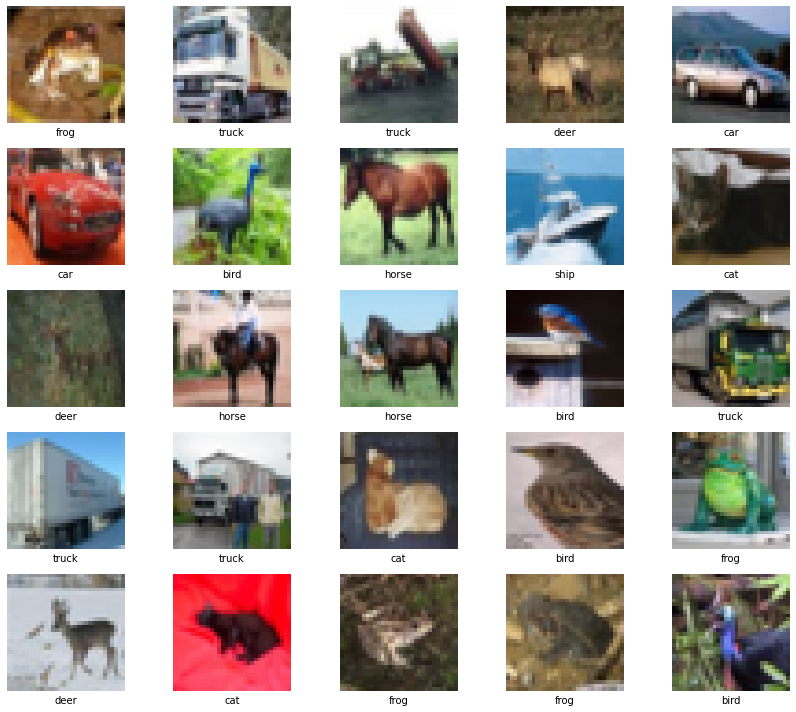

In [6]:
n = (5, 5)

fig, ax = plt.subplots(n[0],n[1],figsize=(12, 10))

for i in range(n[0] * n[1]):
    elem = i
    row = i // n[1]
    col = i % n[1]
    ax[row][col].imshow(x_train[elem].reshape(32,32,3), vmin=0, vmax=1)
    ax[row][col].set(xticks=[], yticks=[], frame_on=False)
    ax[row][col].set(xlabel="{}".format(class_names[y_train[elem].item()]))
fig.tight_layout() 

plt.show()

## 데이터로더

In [7]:
batch_size = 32

In [8]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(x_train.shape[0]).batch(batch_size)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

In [9]:
# Parameters
learning_rate = 0.003
num_epochs = 10

# Network Parameters
num_input = 32*32*3 # MNIST data input (img shape: 32*32)
num_classes = 10 # MNIST total classes (0-9 digits)

In [10]:

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="train_accuracy")

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="test_accuracy")

In [11]:
# 최적화 목적 함수 (cross entropy loss)

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [12]:
# model, optimizer 별로 train_step, test_step 함수를 생성하는 함수
def traintest_generator(model, optimizer):

    @tf.function
    def train_step(xs, ys):
        with tf.GradientTape() as tape:
            # 모형에 데이터를 넣어서 예측 값을 얻음
            predictions = model(xs, training=True)  # training이 True일 경우 dropout 사용
            # 최적화 목표함수를 기준으로 예측 값을 평가 (loss를 구함)
            loss = loss_object(ys, predictions)
        # loss를 최소화하는 기울기(gradient)를 계산함.
        gradients = tape.gradient(loss, model.trainable_variables)
        # 기울기를 바탕으로 모형 파라미터를 수정함
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        # loss, accuracy 기록
        train_loss(loss)
        train_accuracy(labels, predictions)

    @tf.function
    def test_step(xs, ys):
        predictions = model(images, training=False)  # training이 False일 경우 dropout 사용 안함
        t_loss = loss_object(ys, predictions)

        test_loss(t_loss)
        test_accuracy(labels, predictions)
    
    return train_step, test_step

# Activation Function


### 레이어를 10개로 늘립니다.

In [10]:
class DNNModel1(Model):
    def __init__(self, activation_fn):
        super().__init__()
        if activation_fn == "leaky_relu":
            activation_fn = layers.LeakyReLU()
        
        # dense layer 10층
        # feature 수 각각 128개 
        self.L1 = layers.Dense(128, activation=activation_fn, input_shape=(32*32*3,))
        self.L2 = layers.Dense(128, activation=activation_fn)
        self.L3 = layers.Dense(128, activation=activation_fn)
        self.L4 = layers.Dense(128, activation=activation_fn)
        self.L5 = layers.Dense(128, activation=activation_fn)
        self.L6 = layers.Dense(128, activation=activation_fn)
        self.L7 = layers.Dense(128, activation=activation_fn)
        self.L8 = layers.Dense(128, activation=activation_fn)
        self.L9 = layers.Dense(128, activation=activation_fn)
        self.L10 = layers.Dense(num_classes)
    
    def call(self, x):
        x = tf.reshape(x, [-1, 32* 32* 3])
        
        x = self.L1(x)
        x = self.L2(x)
        x = self.L3(x)
        x = self.L4(x)
        x = self.L5(x)
        x = self.L6(x)
        x = self.L7(x)
        x = self.L8(x)
        x = self.L9(x)
        x = self.L10(x)
        return x

# 모형 생성할 때 activation function을 설정 가능
activation_function = "relu" #@param ["relu", "tanh", "sigmoid", "leaky_relu", "elu"]
model1 = DNNModel1(activation_function)

Epoch 1, Loss: 2.0887742042541504, Accuracy: 10.105999946594238, Test Loss: 2.6157279014587402, Test Accuracy: 21.8700008392334
Epoch 2, Loss: 2.0347788333892822, Accuracy: 10.822000503540039, Test Loss: 2.7388317584991455, Test Accuracy: 43.72999954223633
Epoch 3, Loss: 2.023245096206665, Accuracy: 10.980000495910645, Test Loss: 2.91167950630188, Test Accuracy: 21.889999389648438
Epoch 4, Loss: 2.019195795059204, Accuracy: 10.942000389099121, Test Loss: 2.7836532592773438, Test Accuracy: 21.860000610351562
Epoch 5, Loss: 2.0098235607147217, Accuracy: 10.441999435424805, Test Loss: 2.686178207397461, Test Accuracy: 43.709999084472656
Epoch 6, Loss: 2.0047240257263184, Accuracy: 10.874000549316406, Test Loss: 2.6941821575164795, Test Accuracy: 28.110000610351562
Epoch 7, Loss: 1.9972037076950073, Accuracy: 10.2839994430542, Test Loss: 2.7794790267944336, Test Accuracy: 40.59000015258789
Epoch 8, Loss: 2.006340742111206, Accuracy: 10.779999732971191, Test Loss: 2.8820173740386963, Test A

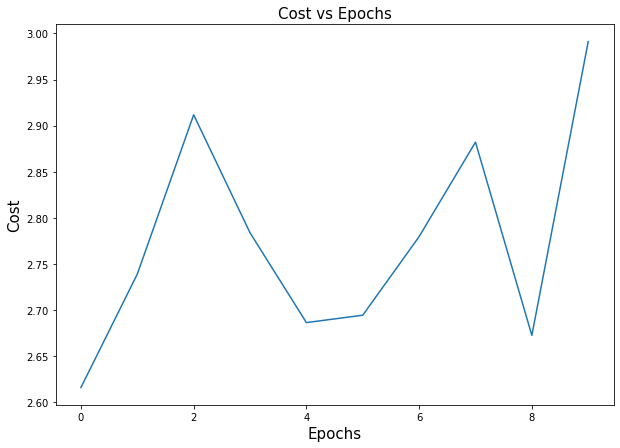

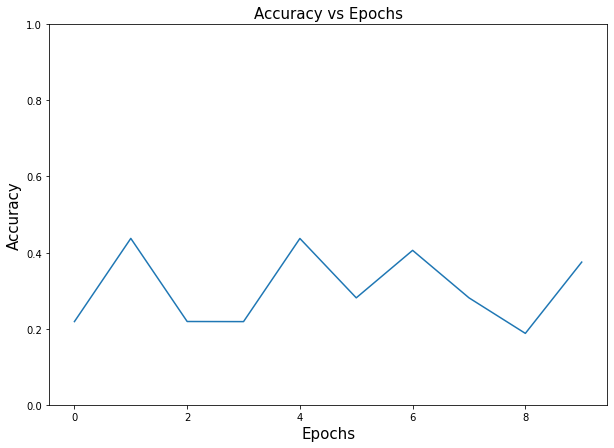

In [11]:
loss_history = []
acc_history = []

# 최적화 알고리즘 (Adam)

optimizer = tf.keras.optimizers.Adam(learning_rate)

train_step1, test_step1 = traintest_generator(model1, optimizer)

for epoch in range(num_epochs):
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()
    
    # training 데이터셋으로 학습
    for images, labels in train_ds:
        train_step1(images, labels)

    # test 데이터셋으로 성능 평가
    for images, labels in test_ds:
        test_step1(images, labels)
        
    print(
        f'Epoch {epoch + 1}, '
        f'Loss: {train_loss.result()}, '
        f'Accuracy: {train_accuracy.result() * 100}, '
        f'Test Loss: {test_loss.result()}, '
        f'Test Accuracy: {test_accuracy.result() * 100}'
    )
    
    acc_history.append(test_accuracy.result())
    loss_history.append(test_loss.result())

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(loss_history)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Cost', fontsize = 15)
plt.title('Cost vs Epochs', fontsize=15)
#ax.set_ylim([0, 3])
plt.show()

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(acc_history)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('Accuracy vs Epochs', fontsize=15)
ax.set_ylim([0, 1])
plt.show()

## 한 번에 실험 진행

In [12]:
for activation_fn in ["relu", "tanh", "sigmoid", "leaky_relu", "elu"]:

    print("Activation function: ", activation_fn)
    
    model = DNNModel1(activation_fn)
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    train_step1, test_step1 = traintest_generator(model, optimizer)
    
    loss_history = []
    acc_history = []

    for epoch in range(num_epochs):
        train_loss.reset_states()
        train_accuracy.reset_states()
        test_loss.reset_states()
        test_accuracy.reset_states()

        for images, labels in train_ds:
            train_step1(images, labels)

        for images, labels in test_ds:
            test_step1(images, labels)

        print(
            f'Epoch {epoch + 1}, '
            f'Loss: {train_loss.result()}, '
            f'Accuracy: {train_accuracy.result() * 100}, '
            f'Test Loss: {test_loss.result()}, '
            f'Test Accuracy: {test_accuracy.result() * 100}'
        )

        acc_history.append(test_accuracy.result())
        loss_history.append(test_loss.result())
    
    fig, ax = plt.subplots(figsize=(10, 7))
    plt.plot(loss_history)
    plt.xlabel('Epochs', fontsize = 15)
    plt.ylabel('Cost', fontsize = 15)
    plt.title('Cost vs Epochs ({})'.format(activation_fn), fontsize=15)
    #ax.set_ylim([0, 3])
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 7))
    plt.plot(acc_history)
    plt.xlabel('Epochs', fontsize = 15)
    plt.ylabel('Accuracy', fontsize = 15)
    plt.title('Accuracy vs Epochs ({})'.format(activation_fn), fontsize=15)
    ax.set_ylim([0, 1])
    plt.show()

Activation function:  relu


KeyboardInterrupt: ignored

## Initialization

In [25]:
class DNNModel2(Model):
    def __init__(self, initializer):
        super().__init__()
        activation_fn = "sigmoid"
        if initializer == "random_normal_dev_e-2":
            initializer = initializers.RandomNormal(stddev=0.01)
            
        # dense layer 10층
        # feature 수 각각 128개
        # activation function: sigmoid
        self.L1 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer, input_shape=(32*32*3,))
        self.L2 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L3 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L4 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L5 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L6 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L7 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L8 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L9 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L10 = layers.Dense(num_classes, kernel_initializer=initializer)
                                      # kernel_initializer가 핵심

    def call(self, x):
        x = tf.reshape(x, [-1, 32* 32* 3])
        
        x = self.L1(x)
        x = self.L2(x)
        x = self.L3(x)
        x = self.L4(x)
        x = self.L5(x)
        x = self.L6(x)
        x = self.L7(x)
        x = self.L8(x)
        x = self.L9(x)
        x = self.L10(x)
        return x

# 모형 생성할 때 initializer를 설정 가능
initializer = "he_uniform"  #@param ["random_normal", "random_normal_dev_e-2", "glorot_normal", "he_uniform"]
model2 = DNNModel2(initializer)

Initializer:  he_uniform


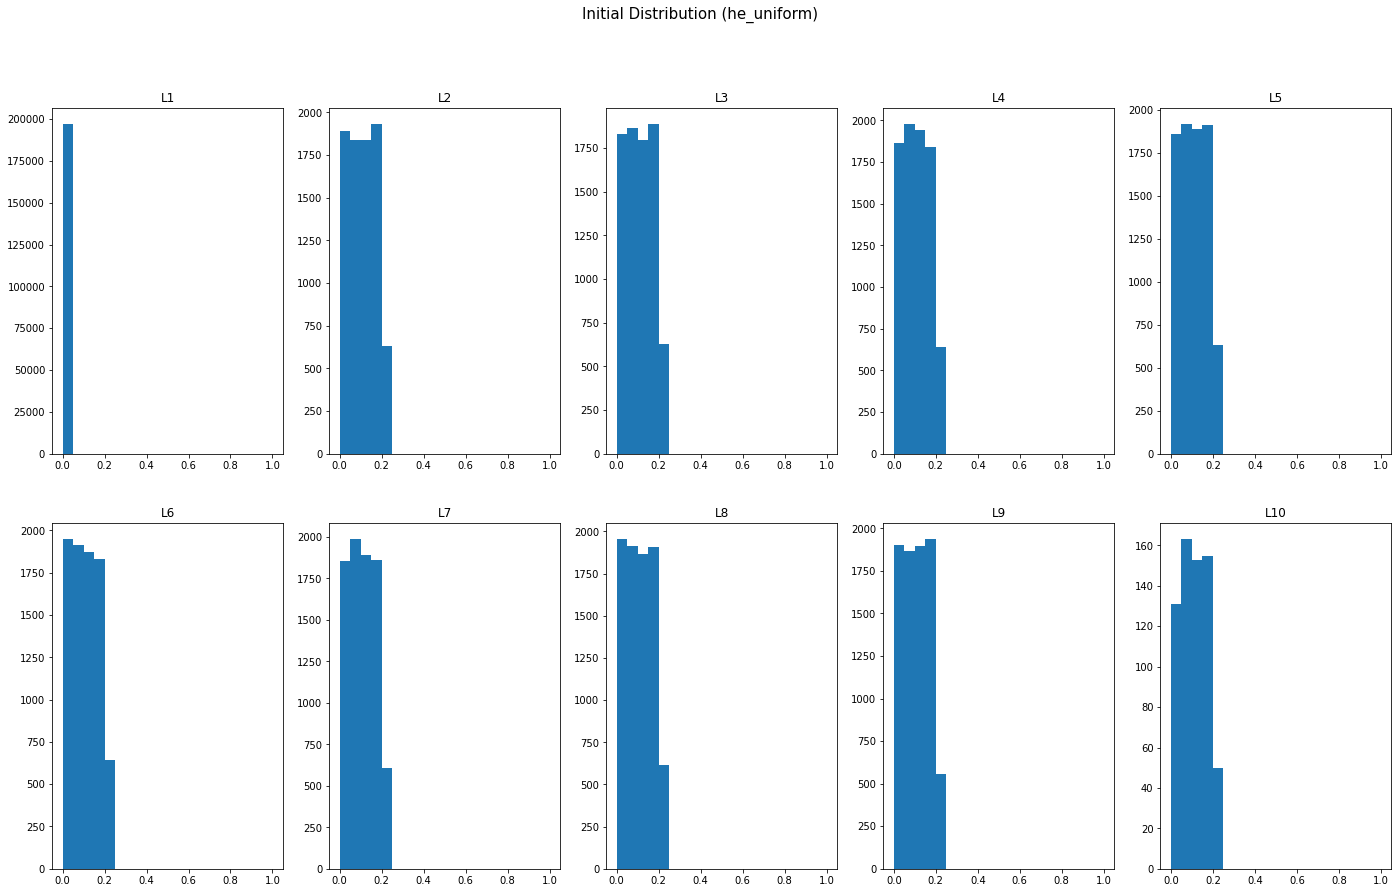

In [26]:
print("Initializer: ", initializer)

optimizer = tf.keras.optimizers.Adam(learning_rate)

# 각 layer 층에서 파라미터(weight)를 가져오는 함수
model2(x_train[0:10]) #0부터 9까지 Layer (10은 미포함)
layer_list = [model2.L1, model2.L2, model2.L3, model2.L4, model2.L5, model2.L6, model2.L7, model2.L8, model2.L9, model2.L10]
output_list = [l.get_weights() for l in layer_list]

# dense layer 층별 파라미터 분포 히스토그램 확인
fig, axs = plt.subplots(2, 5)
fig.suptitle('Initial Distribution ({})'.format(initializer), fontsize=15)
fig.set_size_inches(24, 14)
for i, ax in enumerate(axs.reshape(-1)):
    ax.hist(output_list[i][0].reshape(-1), 20, range=(0,1))
    ax.set_title('L{}'.format(i+1))
plt.show()

Initializer:  glorot_normal


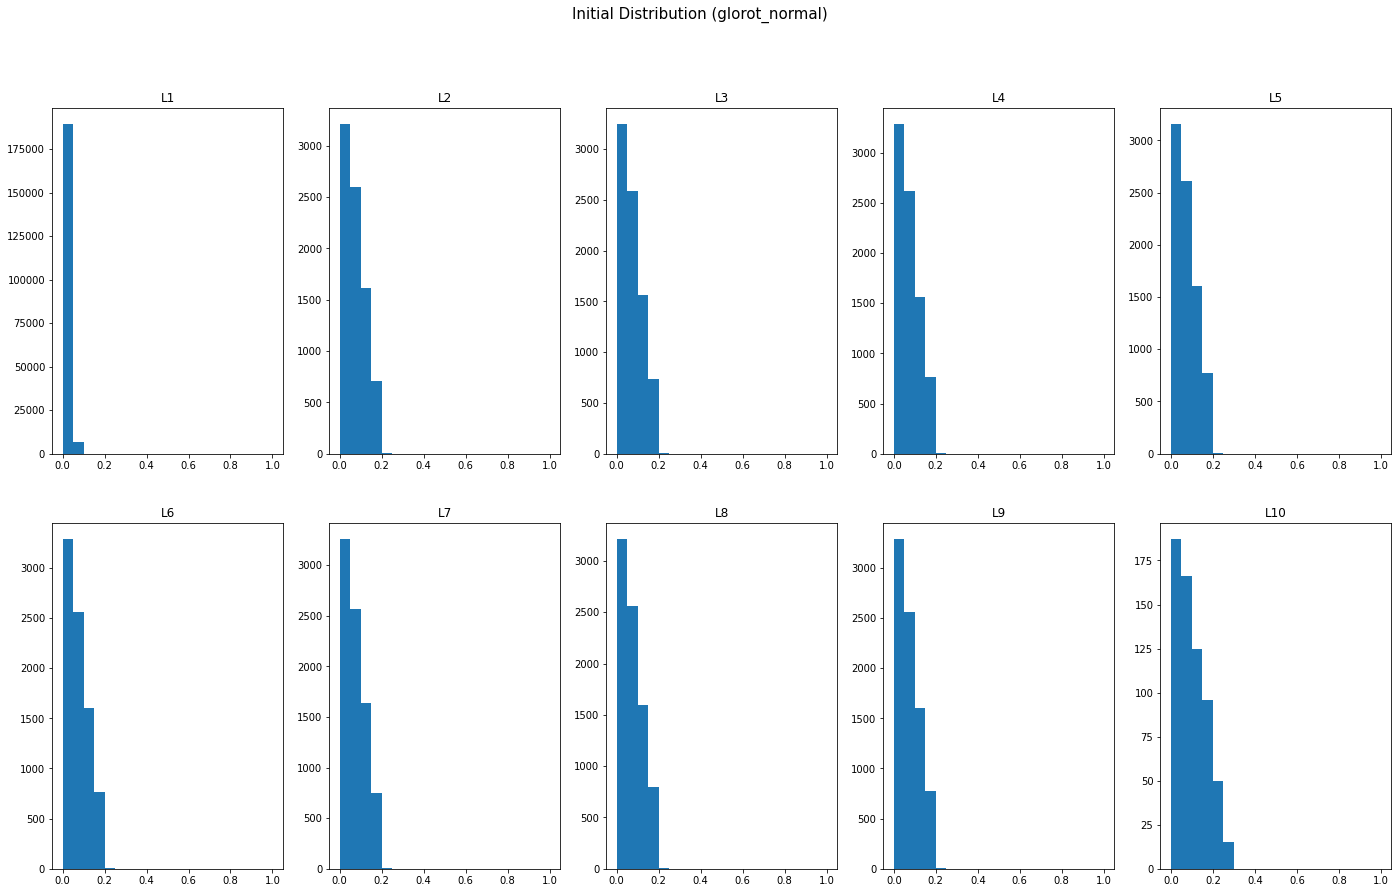

Initializer:  random_normal_dev_e-2


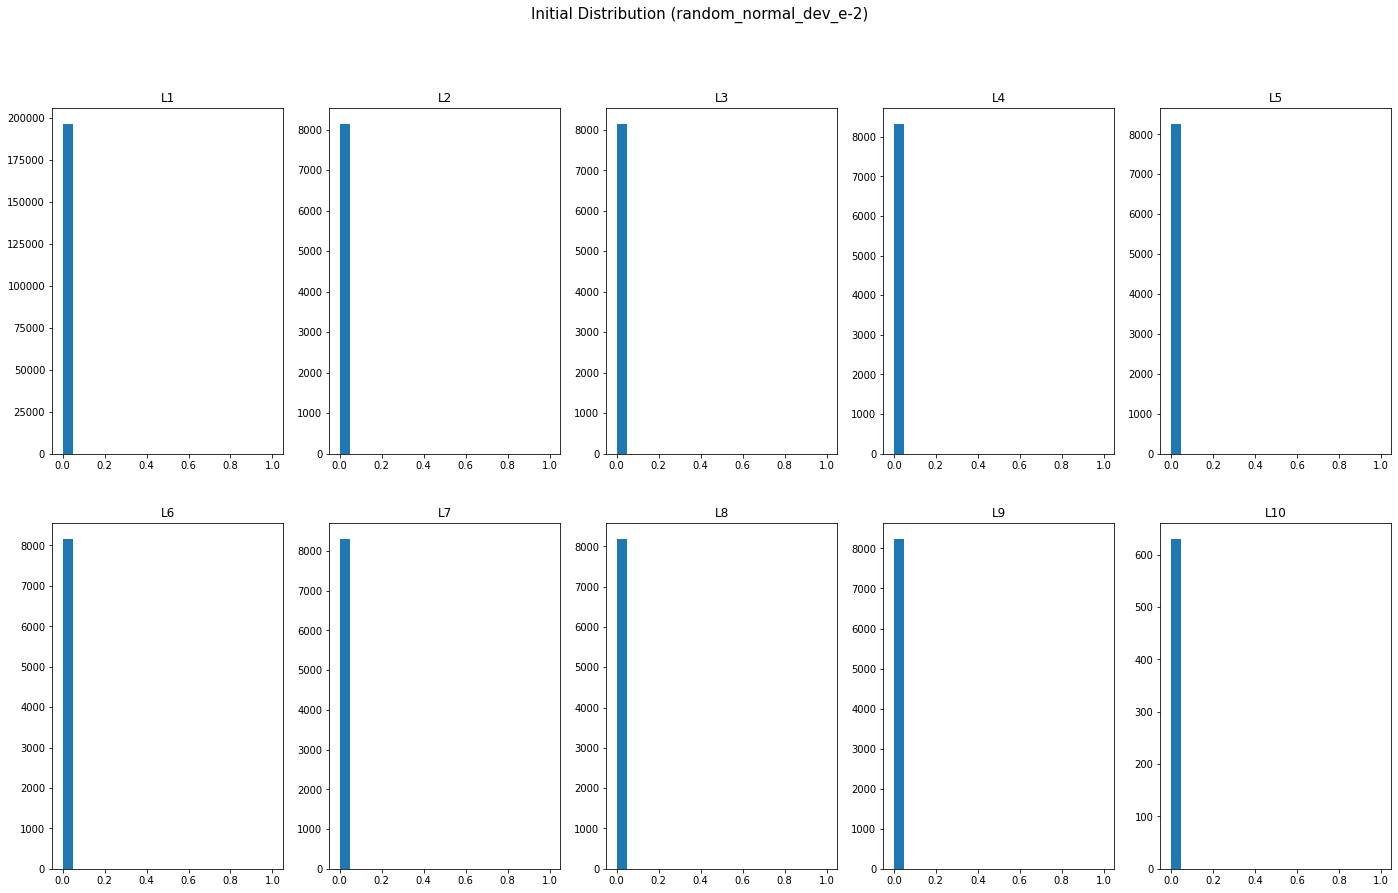

Initializer:  glorot_uniform


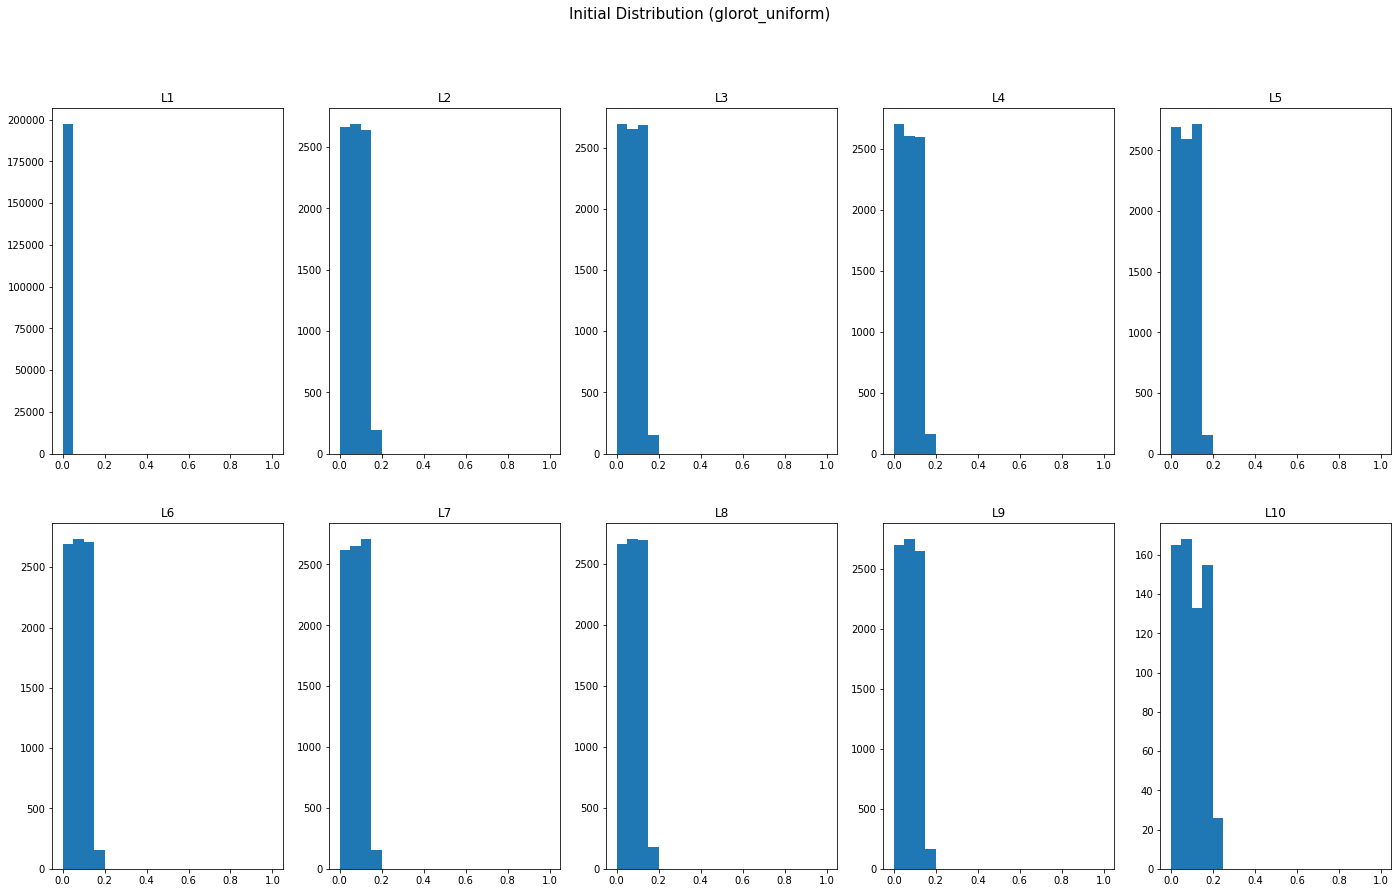

Initializer:  he_uniform


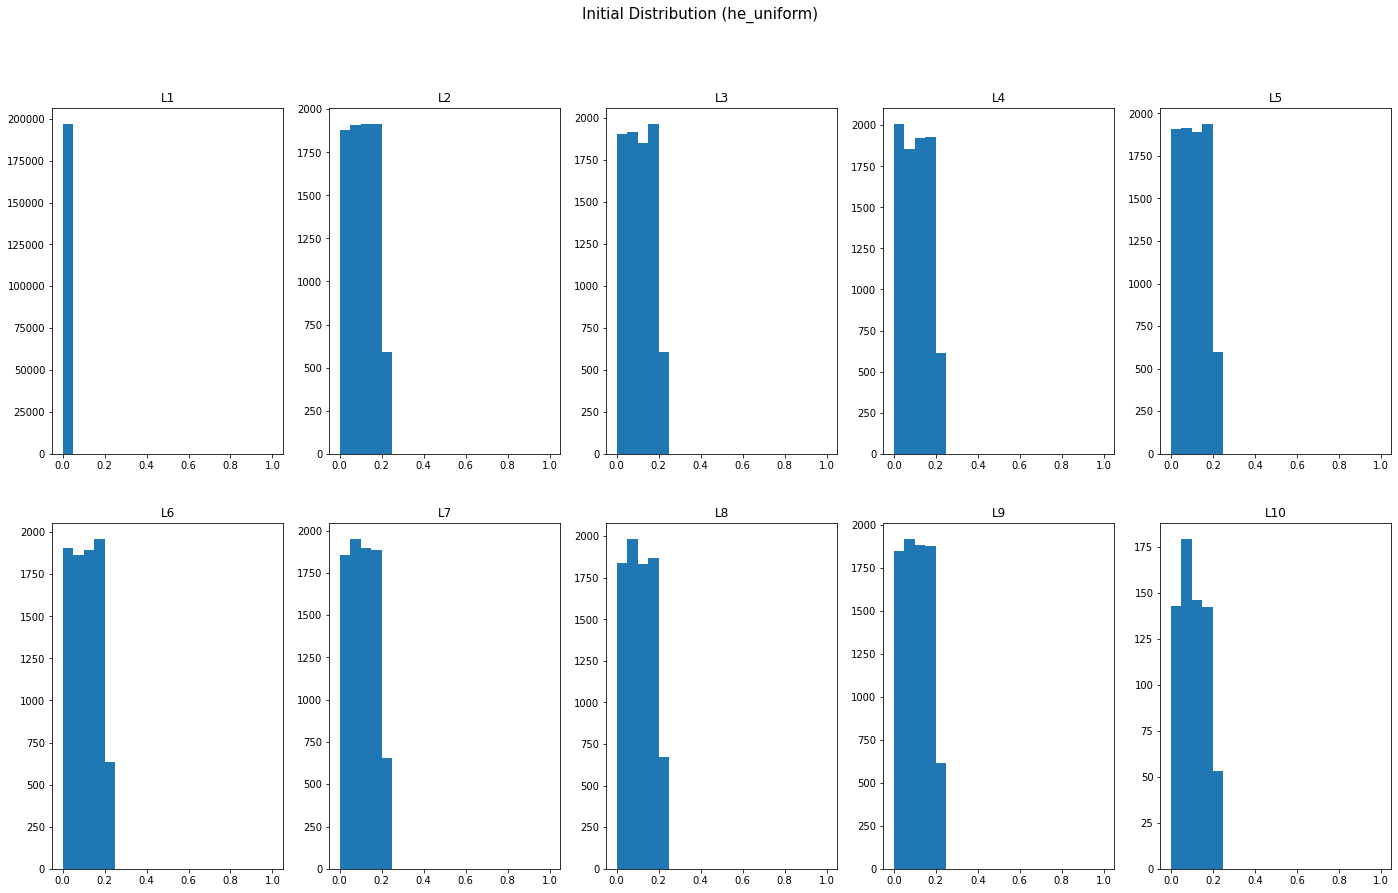

In [30]:
for initializer in ["glorot_normal", "random_normal_dev_e-2", "glorot_uniform", "he_uniform"]:

    print("Initializer: ", initializer)
    
    model = DNNModel2(initializer)
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    
    model(x_train[0:10])
    layer_list = [model.L1, model.L2, model.L3, model.L4, model.L5, model.L6, model.L7, model.L8, model.L9, model.L10]
    output_list = [l.get_weights() for l in layer_list]

    fig, axs = plt.subplots(2, 5)
    fig.suptitle('Initial Distribution ({})'.format(initializer), fontsize=15)
    fig.set_size_inches(24, 14)

    for i, ax in enumerate(axs.reshape(-1)):
        ax.hist(output_list[i][0].reshape(-1), 20, range=(0,1))
        ax.set_title('L{}'.format(i+1))
    plt.show()
    

## Dropout

In [13]:
# 데이터에 감이 없을 때, 분석이 잘 안됐을 때 --> 데이터 최대한 많이 쌓음
# Dropout은 데이터를 많이 쌓고,  Layer을 많이 쌓았을 때 사용 --> 복잡한 다항식 날려버림
# 데이터 분석이 안됐을 때, Dropout을 사용하여 데이터에 대한 감을 잡는다.


class DNNModel3(Model):
    def __init__(self, drop_rate):
        super().__init__()
        activation_fn = "relu"
        initializer = "he_uniform"
        
        # dense layer 10층
        # feature 수 각각 128개
        # activation function: sigmoid
        # initializer: random_normal
        # dropout
        self.L1 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer, input_shape=(32*32*3,))
        self.L2 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L3 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L4 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L5 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L6 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L7 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L8 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L9 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L10 = layers.Dense(num_classes, kernel_initializer=initializer)
        self.dropout = layers.Dropout(drop_rate)
    
    def call(self, x):
        x = tf.reshape(x, [-1, 32* 32* 3])
        
        # 각 층은 Dense layer + activation + dropout으로 이루어져 있음.
        x = self.L1(x)
        x = self.dropout(x)
        x = self.L2(x)
        x = self.dropout(x)
        x = self.L3(x)
        x = self.dropout(x)
        x = self.L4(x)
        x = self.dropout(x)
        x = self.L5(x)
        x = self.dropout(x)
        x = self.L6(x)
        x = self.dropout(x)
        x = self.L7(x)
        x = self.dropout(x)
        x = self.L8(x)
        x = self.dropout(x)
        x = self.L9(x)
        x = self.dropout(x)
        x = self.L10(x)
        return x

# 모델 생성시 drop rate를 설정 가능
drop_rate = 0.1
model3 = DNNModel3(drop_rate)

Epoch 1, Loss: 2.18430495262146, Accuracy: 10.915999412536621, Test Loss: 2.5265934467315674, Test Accuracy: 31.229999542236328
Epoch 2, Loss: 2.146404504776001, Accuracy: 11.227999687194824, Test Loss: 2.5213558673858643, Test Accuracy: 28.080001831054688
Epoch 3, Loss: 2.2186119556427, Accuracy: 10.829999923706055, Test Loss: 2.6183629035949707, Test Accuracy: 34.33000183105469
Epoch 4, Loss: 2.125910758972168, Accuracy: 11.501999855041504, Test Loss: 2.416329860687256, Test Accuracy: 12.489999771118164
Epoch 5, Loss: 2.1227900981903076, Accuracy: 11.113999366760254, Test Loss: 2.572896957397461, Test Accuracy: 31.220001220703125
Epoch 6, Loss: 2.1399405002593994, Accuracy: 11.552000045776367, Test Loss: 2.480717420578003, Test Accuracy: 31.209999084472656
Epoch 7, Loss: 2.119309186935425, Accuracy: 11.082000732421875, Test Loss: 2.4897894859313965, Test Accuracy: 37.470001220703125
Epoch 8, Loss: 2.1419408321380615, Accuracy: 10.857999801635742, Test Loss: 2.5059237480163574, Test A

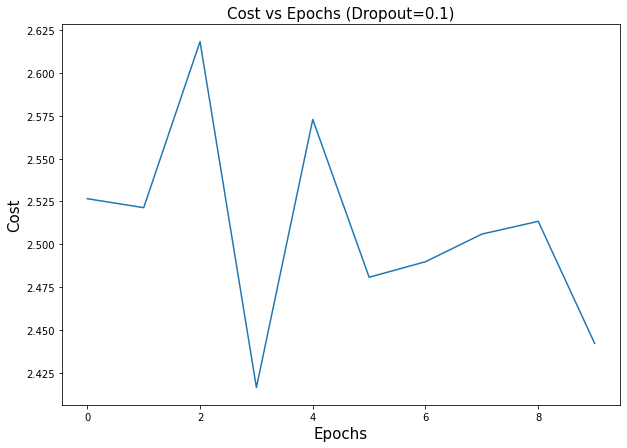

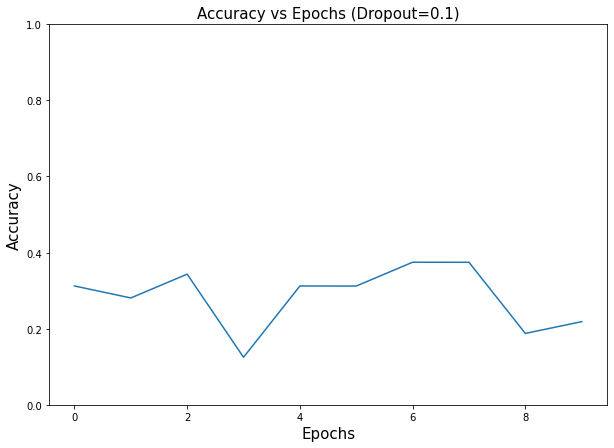

In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate)
train_step1, test_step1 = traintest_generator(model3, optimizer)

loss_history = []
acc_history = []

for epoch in range(num_epochs):
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for images, labels in train_ds:
        train_step1(images, labels)

    for images, labels in test_ds:
        test_step1(images, labels)

    print(
        f'Epoch {epoch + 1}, '
        f'Loss: {train_loss.result()}, '
        f'Accuracy: {train_accuracy.result() * 100}, '
        f'Test Loss: {test_loss.result()}, '
        f'Test Accuracy: {test_accuracy.result() * 100}'
    )

    acc_history.append(test_accuracy.result())
    loss_history.append(test_loss.result())

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(loss_history)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Cost', fontsize = 15)
plt.title('Cost vs Epochs (Dropout={})'.format(drop_rate), fontsize=15)
#ax.set_ylim([0, 3])
plt.show()

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(acc_history)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('Accuracy vs Epochs (Dropout={})'.format(drop_rate), fontsize=15)
ax.set_ylim([0, 1])
plt.show()

## Batch Normalization

In [15]:
class DNNModel4(Model):
    def __init__(self):
        super().__init__()
        activation_fn = "relu"
        initializer = "he_uniform"
        # dense layer 10층
        # feature 수 각각 128개
        # activation function: relu
        # initializer: he_uniform
        self.L1 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer, input_shape=(32*32*3,))
        self.L2 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L3 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L4 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L5 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L6 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L7 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L8 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L9 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L10 = layers.Dense(num_classes, kernel_initializer=initializer)
        self.bn1 = layers.BatchNormalization(momentum=0.9)
        self.bn2 = layers.BatchNormalization(momentum=0.9)
        self.bn3 = layers.BatchNormalization(momentum=0.9)
        self.bn4 = layers.BatchNormalization(momentum=0.9)
        self.bn5 = layers.BatchNormalization(momentum=0.9)
        self.bn6 = layers.BatchNormalization(momentum=0.9)
        self.bn7 = layers.BatchNormalization(momentum=0.9)
        self.bn8 = layers.BatchNormalization(momentum=0.9)
        self.bn9 = layers.BatchNormalization(momentum=0.9)
        self.bn10 = layers.BatchNormalization(momentum=0.9)
    
    def call(self, x):
        x = tf.reshape(x, [-1, 32* 32* 3])
        
        # 각 층은 Dense layer + activation + batch normalization으로 이루어져 있음.
        x = self.L1(x)
        x = self.bn1(x)
        x = self.L2(x)
        x = self.bn2(x)
        x = self.L3(x)
        x = self.bn3(x)
        x = self.L4(x)
        x = self.bn4(x)
        x = self.L5(x)
        x = self.bn5(x)
        x = self.L6(x)
        x = self.bn6(x)
        x = self.L7(x)
        x = self.bn7(x)
        x = self.L8(x)
        x = self.bn8(x)
        x = self.L9(x)
        x = self.bn9(x)
        x = self.L10(x)
        x = self.bn10(x)
        return x

model4 = DNNModel4()

Epoch 1, Loss: 1.8548918962478638, Accuracy: 9.979999542236328, Test Loss: 2.9001169204711914, Test Accuracy: 40.59000015258789
Epoch 2, Loss: 1.7137786149978638, Accuracy: 10.208000183105469, Test Loss: 3.1027109622955322, Test Accuracy: 34.369998931884766
Epoch 3, Loss: 1.6560451984405518, Accuracy: 10.15999984741211, Test Loss: 3.2968339920043945, Test Accuracy: 46.849998474121094
Epoch 4, Loss: 1.603990912437439, Accuracy: 9.82800006866455, Test Loss: 3.399029016494751, Test Accuracy: 62.470001220703125
Epoch 5, Loss: 1.5552453994750977, Accuracy: 9.972000122070312, Test Loss: 3.3014843463897705, Test Accuracy: 49.97999954223633
Epoch 6, Loss: 1.5210390090942383, Accuracy: 10.184000015258789, Test Loss: 3.3097684383392334, Test Accuracy: 37.4900016784668
Epoch 7, Loss: 1.495560646057129, Accuracy: 10.095999717712402, Test Loss: 3.584094285964966, Test Accuracy: 62.459999084472656
Epoch 8, Loss: 1.4640394449234009, Accuracy: 10.182000160217285, Test Loss: 3.6156816482543945, Test Ac

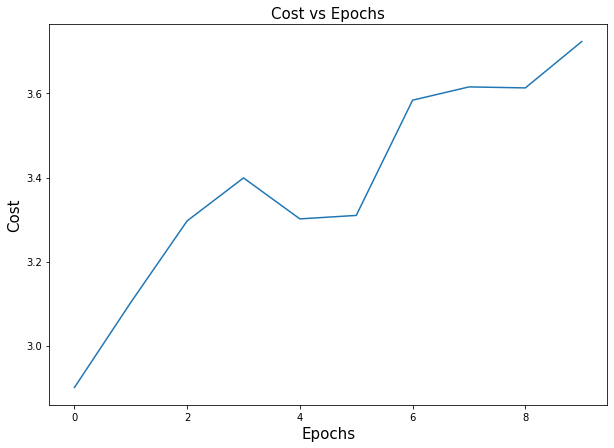

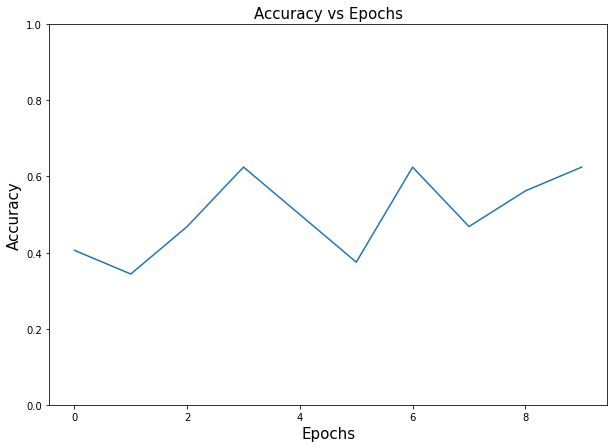

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate)
train_step1, test_step1 = traintest_generator(model4, optimizer)

loss_history = []
acc_history = []

for epoch in range(num_epochs):
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for images, labels in train_ds:
        train_step1(images, labels)

    for images, labels in test_ds:
        test_step1(images, labels)

    print(
        f'Epoch {epoch + 1}, '
        f'Loss: {train_loss.result()}, '
        f'Accuracy: {train_accuracy.result() * 100}, '
        f'Test Loss: {test_loss.result()}, '
        f'Test Accuracy: {test_accuracy.result() * 100}'
    )

    acc_history.append(test_accuracy.result())
    loss_history.append(test_loss.result())

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(loss_history)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Cost', fontsize = 15)
plt.title('Cost vs Epochs', fontsize=15)
#ax.set_ylim([0, 3])
plt.show()

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(acc_history)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('Accuracy vs Epochs', fontsize=15)
ax.set_ylim([0, 1])
plt.show()

## Batch norm + dropout + initialization + activation

In [17]:
# 데이터 한개 --> 모델 새로 설계가 아니라, 데이터를 한번에 넣고 모델 한번에 설계 --> 너무 느림
# 미니배치 생성 --> 소대 단위로 데이터 학습 --> 미니 모델 생성 --> 반복 --> 전체 모델 탄생


class DNNModel5(Model):
    def __init__(self, drop_rate):
        super().__init__()
        activation_fn = "relu"
        initializer = "he_uniform"
        # dense layer 10층
        # feature 수 각각 128개
        # activation function: relu
        # initializer: he_uniform
        # dropout
        self.L1 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer, input_shape=(32*32*3,))
        self.L2 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L3 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L4 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L5 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L6 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L7 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L8 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L9 = layers.Dense(128, activation=activation_fn, kernel_initializer=initializer)
        self.L10 = layers.Dense(num_classes, kernel_initializer=initializer)
        self.bn1 = layers.BatchNormalization(momentum=0.9)
        self.bn2 = layers.BatchNormalization(momentum=0.9)
        self.bn3 = layers.BatchNormalization(momentum=0.9)
        self.bn4 = layers.BatchNormalization(momentum=0.9)
        self.bn5 = layers.BatchNormalization(momentum=0.9)
        self.bn6 = layers.BatchNormalization(momentum=0.9)
        self.bn7 = layers.BatchNormalization(momentum=0.9)
        self.bn8 = layers.BatchNormalization(momentum=0.9)
        self.bn9 = layers.BatchNormalization(momentum=0.9)
        self.bn10 = layers.BatchNormalization(momentum=0.9)
        self.dropout = layers.Dropout(drop_rate)
    
    def call(self, x):
        x = tf.reshape(x, [-1, 32* 32* 3])
        # 각 층은 Dense layer + activation + dropout + batch normalization으로 이루어져 있음.
        x = self.L1(x)
        x = self.bn1(x)
        x = self.dropout(x)
        x = self.L2(x)
        x = self.bn2(x)
        x = self.dropout(x)
        x = self.L3(x)
        x = self.bn3(x)
        x = self.dropout(x)
        x = self.L4(x)
        x = self.bn4(x)
        x = self.dropout(x)
        x = self.L5(x)
        x = self.bn5(x)
        x = self.dropout(x)
        x = self.L6(x)
        x = self.bn6(x)
        x = self.dropout(x)
        x = self.L7(x)
        x = self.bn7(x)
        x = self.dropout(x)
        x = self.L8(x)
        x = self.bn8(x)
        x = self.dropout(x)
        x = self.L9(x)
        x = self.bn9(x)
        x = self.dropout(x)
        x = self.L10(x)
        x = self.bn10(x)
        x = self.dropout(x)
        return x

# 모델 생성시 drop rate를 설정 가능
model5 = DNNModel5(0.2)

Epoch 1, Loss: 2.094381332397461, Accuracy: 9.691999435424805, Test Loss: 2.64615535736084, Test Accuracy: 49.97999954223633
Epoch 2, Loss: 1.9775892496109009, Accuracy: 9.741999626159668, Test Loss: 2.6586756706237793, Test Accuracy: 50.0
Epoch 3, Loss: 1.9691423177719116, Accuracy: 9.87600040435791, Test Loss: 2.6446681022644043, Test Accuracy: 56.19999694824219
Epoch 4, Loss: 1.9561784267425537, Accuracy: 9.904000282287598, Test Loss: 2.644742250442505, Test Accuracy: 43.720001220703125
Epoch 5, Loss: 1.9398247003555298, Accuracy: 10.23799991607666, Test Loss: 2.7399961948394775, Test Accuracy: 53.1099967956543
Epoch 6, Loss: 1.9261094331741333, Accuracy: 10.265999794006348, Test Loss: 2.7102346420288086, Test Accuracy: 37.4900016784668
Epoch 7, Loss: 1.9206336736679077, Accuracy: 10.164000511169434, Test Loss: 2.7615952491760254, Test Accuracy: 53.09000015258789
Epoch 8, Loss: 1.9182361364364624, Accuracy: 9.87600040435791, Test Loss: 2.7100954055786133, Test Accuracy: 43.720001220

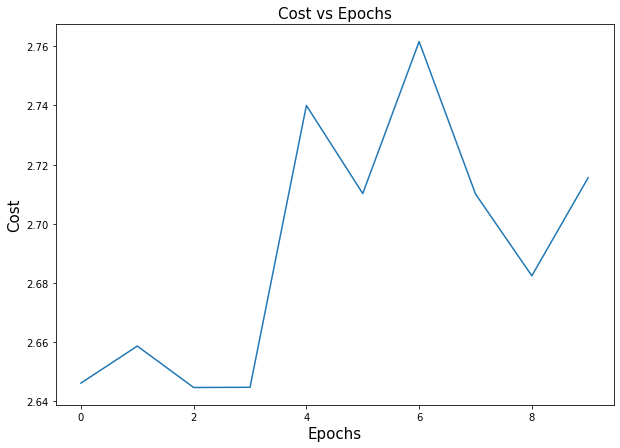

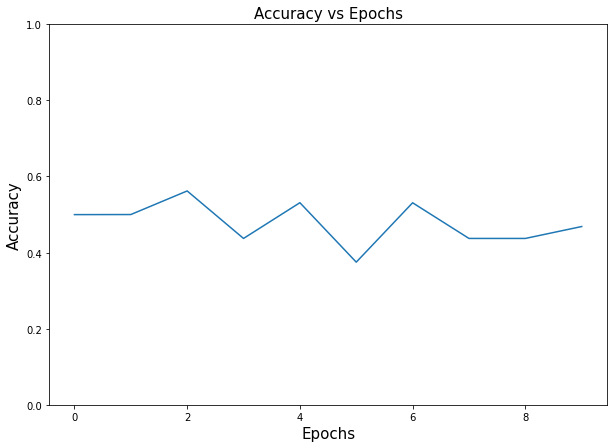

In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate)
train_step1, test_step1 = traintest_generator(model5, optimizer)

loss_history = []
acc_history = []

for epoch in range(num_epochs):
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for images, labels in train_ds:
        train_step1(images, labels)

    for images, labels in test_ds:
        test_step1(images, labels)

    print(
        f'Epoch {epoch + 1}, '
        f'Loss: {train_loss.result()}, '
        f'Accuracy: {train_accuracy.result() * 100}, '
        f'Test Loss: {test_loss.result()}, '
        f'Test Accuracy: {test_accuracy.result() * 100}'
    )

    acc_history.append(test_accuracy.result())
    loss_history.append(test_loss.result())

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(loss_history)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Cost', fontsize = 15)
plt.title('Cost vs Epochs', fontsize=15)
#ax.set_ylim([0, 3])
plt.show()

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(acc_history)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('Accuracy vs Epochs', fontsize=15)
ax.set_ylim([0, 1])
plt.show()